In [1]:
import os
%pwd

'd:\\ML-Projects\\03-Air-Quality-Index-Predictor\\research'

In [2]:
os.chdir("../")
%pwd

'd:\\ML-Projects\\03-Air-Quality-Index-Predictor'

<a id="1"></a>  
# <p style="padding:10px;background-color:#2e5551;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">1. Import Libraries</p>

In [53]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set_style("darkgrid")

import plotly.express as px
import plotly.graph_objects as go




<a id="1"></a>  
# <p style="padding:10px;background-color:#2e5551;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">2. Reading and Understanding the Dataset</p>

<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">2.1. Import Dataset</p>

In [4]:
df = pd.read_csv("artifacts/data_ingestion/air_pollutant_data.csv")
df.head()

,id,city,date,pm2_5,pm10,o3,no2,so2,co
0,0,Ahmedabad,01-01-2021,143.591,165.297,54.916,34.932,37.484,1414.092
1,1,Ahmedabad,02-01-2021,143.229,165.222,54.392,34.961,37.303,1427.204
2,2,Ahmedabad,03-01-2021,144.486,166.816,53.800,35.367,37.860,1448.395
3,3,Ahmedabad,04-01-2021,144.004,166.409,53.201,35.544,38.279,1459.212
4,4,Ahmedabad,05-01-2021,139.472,161.875,52.996,35.215,37.816,1444.993


<a id="1"></a>  
#### <p style="padding:5px;background-color:#d5eae9;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:200">2.2. Discover Data</p>

In [5]:
# View dimensions of dataset   
rows, col = df.shape
print ("Dimensions of dataset: {}" . format (df.shape))
print ('Rows:', rows,'\nColumns:', col)

Dimensions of dataset: (12060, 9)
Rows: 12060 
Columns: 9


In [6]:
# Check of missing values
df.isna().sum()

id       0
city     0
date     0
pm2_5    0
pm10     0
o3       0
no2      0
so2      0
co       0
dtype: int64

In [7]:
# Number of uniqe elements in each columns
unique = df.nunique()
unique.to_frame().T

,id,city,date,pm2_5,pm10,o3,no2,so2,co
0,12060,10,1206,11626,11736,11265,10789,11004,11926


In [8]:
# Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12060 entries, 0 to 12059
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      12060 non-null  int64  
 1   city    12060 non-null  object 
 2   date    12060 non-null  object 
 3   pm2_5   12060 non-null  float64
 4   pm10    12060 non-null  float64
 5   o3      12060 non-null  float64
 6   no2     12060 non-null  float64
 7   so2     12060 non-null  float64
 8   co      12060 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 848.1+ KB


**The date column is an object so we have to convert it into date format**

In [9]:
# Check Statistics of Data
df.describe()

,id,pm2_5,pm10,o3,no2,so2,co
count,12060.000000,12060.000000,12060.000000,12060.000000,12060.000000,12060.000000,12060.000000
mean,6029.500000,100.091101,126.753194,53.987205,32.626765,35.375115,1240.838605
std,3481.566458,107.880135,127.002088,26.391044,21.850276,26.241574,1095.211112
min,0.000000,1.899000,2.614000,-73.847000,2.367000,2.065000,208.614000
25%,3014.750000,30.831500,42.856500,34.350750,16.737000,13.244750,542.291750
50%,6029.500000,64.469000,89.456500,53.665000,26.572500,27.593500,852.287000
75%,9044.250000,119.349750,150.518000,73.132000,40.342500,55.558000,1451.376500
max,12059.000000,734.026000,841.154000,166.735000,174.526000,181.943000,7574.902000


<a id="1"></a>  
# <p style="padding:10px;background-color:#2e5551;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">3. Data Preprocessing</p>

## 1. Date Column

In [10]:
df['date'].sample(20) 

11092    04-09-2021
2618     02-08-2021
11417    06-08-2022
9575     17-03-2024
645      29-10-2022
10853    30-05-2024
8154     08-08-2023
11662    16-04-2023
10213    08-08-2022
4320     27-12-2022
10020    20-01-2022
5941     01-03-2024
9096     08-11-2022
3506     06-02-2024
2077     20-06-2023
10674    27-11-2023
11362    10-06-2022
5291     28-04-2022
3163     16-02-2023
9581     23-03-2024
Name: date, dtype: object

<div style="background-color: black; padding:20px; font-size:20px; color: white">
It seems so that the date is arranged in day-month-year format

In [11]:
df['date'] = pd.to_datetime(df['date'],format = "%d-%m-%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12060 entries, 0 to 12059
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   id      12060 non-null  int64         
 1   city    12060 non-null  object        
 2   date    12060 non-null  datetime64[ns]
 3   pm2_5   12060 non-null  float64       
 4   pm10    12060 non-null  float64       
 5   o3      12060 non-null  float64       
 6   no2     12060 non-null  float64       
 7   so2     12060 non-null  float64       
 8   co      12060 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 848.1+ KB


In [12]:
df['date'].sort_values(ascending = False)

12059   2024-05-30
9647    2024-05-30
6029    2024-05-30
3617    2024-05-30
7235    2024-05-30
           ...    
4824    2021-01-01
3618    2021-01-01
2412    2021-01-01
1206    2021-01-01
6030    2021-01-01
Name: date, Length: 12060, dtype: datetime64[ns]

## 3. City column

In [13]:
print("Total number of cities are ",df['city'].nunique() )
df['city'].value_counts()

Total number of cities are  10


city
Ahmedabad    1206
Bangalore    1206
Chennai      1206
Delhi        1206
Hyderabad    1206
Jaipur       1206
Kolkata      1206
Mumbai       1206
Pune         1206
Surat        1206
Name: count, dtype: int64

## 4. O3 Column


In [14]:
df[df['o3']<0]

,id,city,date,pm2_5,pm10,o3,no2,so2,co
881,881,Ahmedabad,2023-07-01,22.902,28.608,-0.806,18.444,27.443,470.796
882,882,Ahmedabad,2023-07-02,23.324,29.167,-1.346,18.601,27.868,473.966
883,883,Ahmedabad,2023-07-03,23.645,29.546,-2.045,18.643,27.965,477.577
884,884,Ahmedabad,2023-07-04,23.627,29.493,-3.204,18.525,27.619,477.806
885,885,Ahmedabad,2023-07-05,23.601,29.424,-3.799,18.457,27.519,476.168
...,...,...,...,...,...,...,...,...,...
11756,11756,Surat,2023-07-22,20.853,25.621,-35.601,20.413,57.152,382.865
11757,11757,Surat,2023-07-23,20.607,25.645,-40.956,19.708,56.346,375.475
11758,11758,Surat,2023-07-24,22.025,27.604,-48.673,20.325,58.986,382.364
11759,11759,Surat,2023-07-25,23.007,29.242,-59.028,21.046,60.588,387.563


In [15]:
df['o3'] = df['o3'].apply(lambda x: 0 if x < 0 else x)

## 5. CO column

In [17]:
# Convert CO column from μg/m3 to mg/m3
df['co'] = df['co'] / 1000

In [18]:
df.describe()

,id,date,pm2_5,pm10,o3,no2,so2,co
count,12060.000000,12060,12060.000000,12060.000000,12060.000000,12060.000000,12060.000000,12060.000000
mean,6029.500000,2022-09-15 12:33:25.970148864,100.091101,126.753194,54.217324,32.626765,35.375115,1.240839
min,0.000000,2021-01-01 00:00:00,1.899000,2.614000,0.000000,2.367000,2.065000,0.208614
25%,3014.750000,2021-11-08 00:00:00,30.831500,42.856500,34.350750,16.737000,13.244750,0.542292
50%,6029.500000,2022-09-15 12:00:00,64.469000,89.456500,53.665000,26.572500,27.593500,0.852287
75%,9044.250000,2023-07-24 00:00:00,119.349750,150.518000,73.132000,40.342500,55.558000,1.451377
max,12059.000000,2024-05-30 00:00:00,734.026000,841.154000,166.735000,174.526000,181.943000,7.574902
std,3481.566458,NaN,107.880135,127.002088,25.763031,21.850276,26.241574,1.095211


## 6. Fixing names

In [19]:
df.columns

Index(['id', 'city', 'date', 'pm2_5', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

In [20]:
df.rename(columns = {'co':'CO','no2':'NO2','o3':'O3','pm10':'PM10','pm2_5':'PM2.5','so2':'SO2'}, inplace = True) 
df.columns

Index(['id', 'city', 'date', 'PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO'], dtype='object')

## 7. Calculating AQI

<div style="background-color: black; padding:20px; font-size:20px; color: white">
Now we have some proper values of the major contributer of the air pollution <p>
We will we consider the columns CO , NO2, O3, PM10, PM2.5 ,SO2<p>
We will we now finding the AQI acording to the standard formula


In [21]:
new_df = df.copy()

In [22]:
## PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

## PM2.5 Sub-Index calculation
def get_PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0


## SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

## NOx Sub-Index calculation
def get_NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

### CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

## O3 Sub-Index calculation
def get_O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

new_df["PM2.5_SubIndex"] = new_df["PM2.5"].apply(lambda x: get_PM25_subindex(x))

new_df["PM10_SubIndex"] = new_df["PM10"].apply(lambda x: get_PM10_subindex(x))

new_df["O3_SubIndex"] = new_df["O3"].apply(lambda x: get_O3_subindex(x))

new_df["CO_SubIndex"] = new_df["CO"].apply(lambda x: get_CO_subindex(x))

new_df["NOx_SubIndex"] = new_df["NO2"].apply(lambda x: get_NOx_subindex(x))

new_df["SO2_SubIndex"] = new_df["SO2"].apply(lambda x: get_SO2_subindex(x))


In [23]:
new_df.head()

,id,city,date,PM2.5,PM10,O3,NO2,SO2,CO,PM2.5_SubIndex,PM10_SubIndex,O3_SubIndex,CO_SubIndex,NOx_SubIndex,SO2_SubIndex
0,0,Ahmedabad,2021-01-01,143.591,165.297,54.916,34.932,37.484,1.414092,318.146923,143.531333,54.916,70.70460,43.66500,46.85500
1,1,Ahmedabad,2021-01-02,143.229,165.222,54.392,34.961,37.303,1.427204,317.868462,143.481333,54.392,71.36020,43.70125,46.62875
2,2,Ahmedabad,2021-01-03,144.486,166.816,53.800,35.367,37.860,1.448395,318.835385,144.544000,53.800,72.41975,44.20875,47.32500
3,3,Ahmedabad,2021-01-04,144.004,166.409,53.201,35.544,38.279,1.459212,318.464615,144.272667,53.201,72.96060,44.43000,47.84875
4,4,Ahmedabad,2021-01-05,139.472,161.875,52.996,35.215,37.816,1.444993,314.978462,141.250000,52.996,72.24965,44.01875,47.27000


<div style="background-color: black; padding:20px; font-size:20px; color: white">
For the new columns we replaced null values with zero

In [25]:
## AQI bucketing
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x <= 100:
        return "Satisfactory"
    elif x <= 200:
        return "Moderate"
    elif x <= 300:
        return "Poor"
    elif x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return np.NaN

# We are adding a Checks column which will tell us how many pollutants we have condidered 
# for the calculation of the AQI in case if some are null
new_df["Checks"] = (new_df["PM2.5_SubIndex"] > 0).astype(int) + \
                (new_df["PM10_SubIndex"] > 0).astype(int) + \
                (new_df["SO2_SubIndex"] > 0).astype(int) + \
                (new_df["NOx_SubIndex"] > 0).astype(int) + \
                (new_df["CO_SubIndex"] > 0).astype(int) + \
                (new_df["O3_SubIndex"] > 0).astype(int)

# The Aqi value is going to the value of the highest air pollutant
new_df["AQI_calculated"] = round(new_df[["PM2.5_SubIndex", "PM10_SubIndex", "SO2_SubIndex", "NOx_SubIndex",
                                  "CO_SubIndex", "O3_SubIndex"]].max(axis = 1))
new_df.loc[new_df["PM2.5_SubIndex"] + new_df["PM10_SubIndex"] <= 0, "AQI_calculated"] = np.NaN
new_df.loc[new_df.Checks < 3, "AQI_calculated"] = np.NaN

new_df["AQI_bucket_calculated"] = new_df["AQI_calculated"].apply(lambda x: get_AQI_bucket(x))
new_df[~new_df.AQI_calculated.isna()].head(13)


,id,city,date,PM2.5,PM10,O3,NO2,SO2,CO,PM2.5_SubIndex,PM10_SubIndex,O3_SubIndex,CO_SubIndex,NOx_SubIndex,SO2_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated
0,0,Ahmedabad,2021-01-01,143.591,165.297,54.916,34.932,37.484,1.414092,318.146923,143.531333,54.916,70.70460,43.66500,46.85500,6,318.0,Very Poor
1,1,Ahmedabad,2021-01-02,143.229,165.222,54.392,34.961,37.303,1.427204,317.868462,143.481333,54.392,71.36020,43.70125,46.62875,6,318.0,Very Poor
2,2,Ahmedabad,2021-01-03,144.486,166.816,53.800,35.367,37.860,1.448395,318.835385,144.544000,53.800,72.41975,44.20875,47.32500,6,319.0,Very Poor
3,3,Ahmedabad,2021-01-04,144.004,166.409,53.201,35.544,38.279,1.459212,318.464615,144.272667,53.201,72.96060,44.43000,47.84875,6,318.0,Very Poor
4,4,Ahmedabad,2021-01-05,139.472,161.875,52.996,35.215,37.816,1.444993,314.978462,141.250000,52.996,72.24965,44.01875,47.27000,6,315.0,Very Poor
5,5,Ahmedabad,2021-01-06,138.035,160.666,52.023,35.471,38.147,1.457115,313.873077,140.444000,52.023,72.85575,44.33875,47.68375,6,314.0,Very Poor
6,6,Ahmedabad,2021-01-07,137.113,159.796,52.150,35.063,37.934,1.443516,313.163846,139.864000,52.150,72.17580,43.82875,47.41750,6,313.0,Very Poor
7,7,Ahmedabad,2021-01-08,139.550,162.636,52.345,35.235,38.389,1.457608,315.038462,141.757333,52.345,72.88040,44.04375,47.98625,6,315.0,Very Poor
8,8,Ahmedabad,2021-01-09,141.492,165.106,52.459,35.321,38.490,1.477533,316.532308,143.404000,52.459,73.87665,44.15125,48.11250,6,317.0,Very Poor
9,9,Ahmedabad,2021-01-10,143.150,167.380,52.706,35.587,38.961,1.495681,317.807692,144.920000,52.706,74.78405,44.48375,48.70125,6,318.0,Very Poor


<a id="1"></a>  
# <p style="padding:10px;background-color:#254441;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">5. Exploratory Data Analysis (EDA)</p>

## 5.1 Visualizing the missing values

In [26]:
# Missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(new_df)
missing_values.style.background_gradient(cmap='Reds')

Your selected dataframe has 18 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## 5.2 Visualizing the pollutants

In [27]:
new_df['Particulate_Matter'] = new_df['PM2.5'] + new_df['PM10']
pollutants = ['PM2.5','PM10','NO2', 'CO', 'SO2','O3']

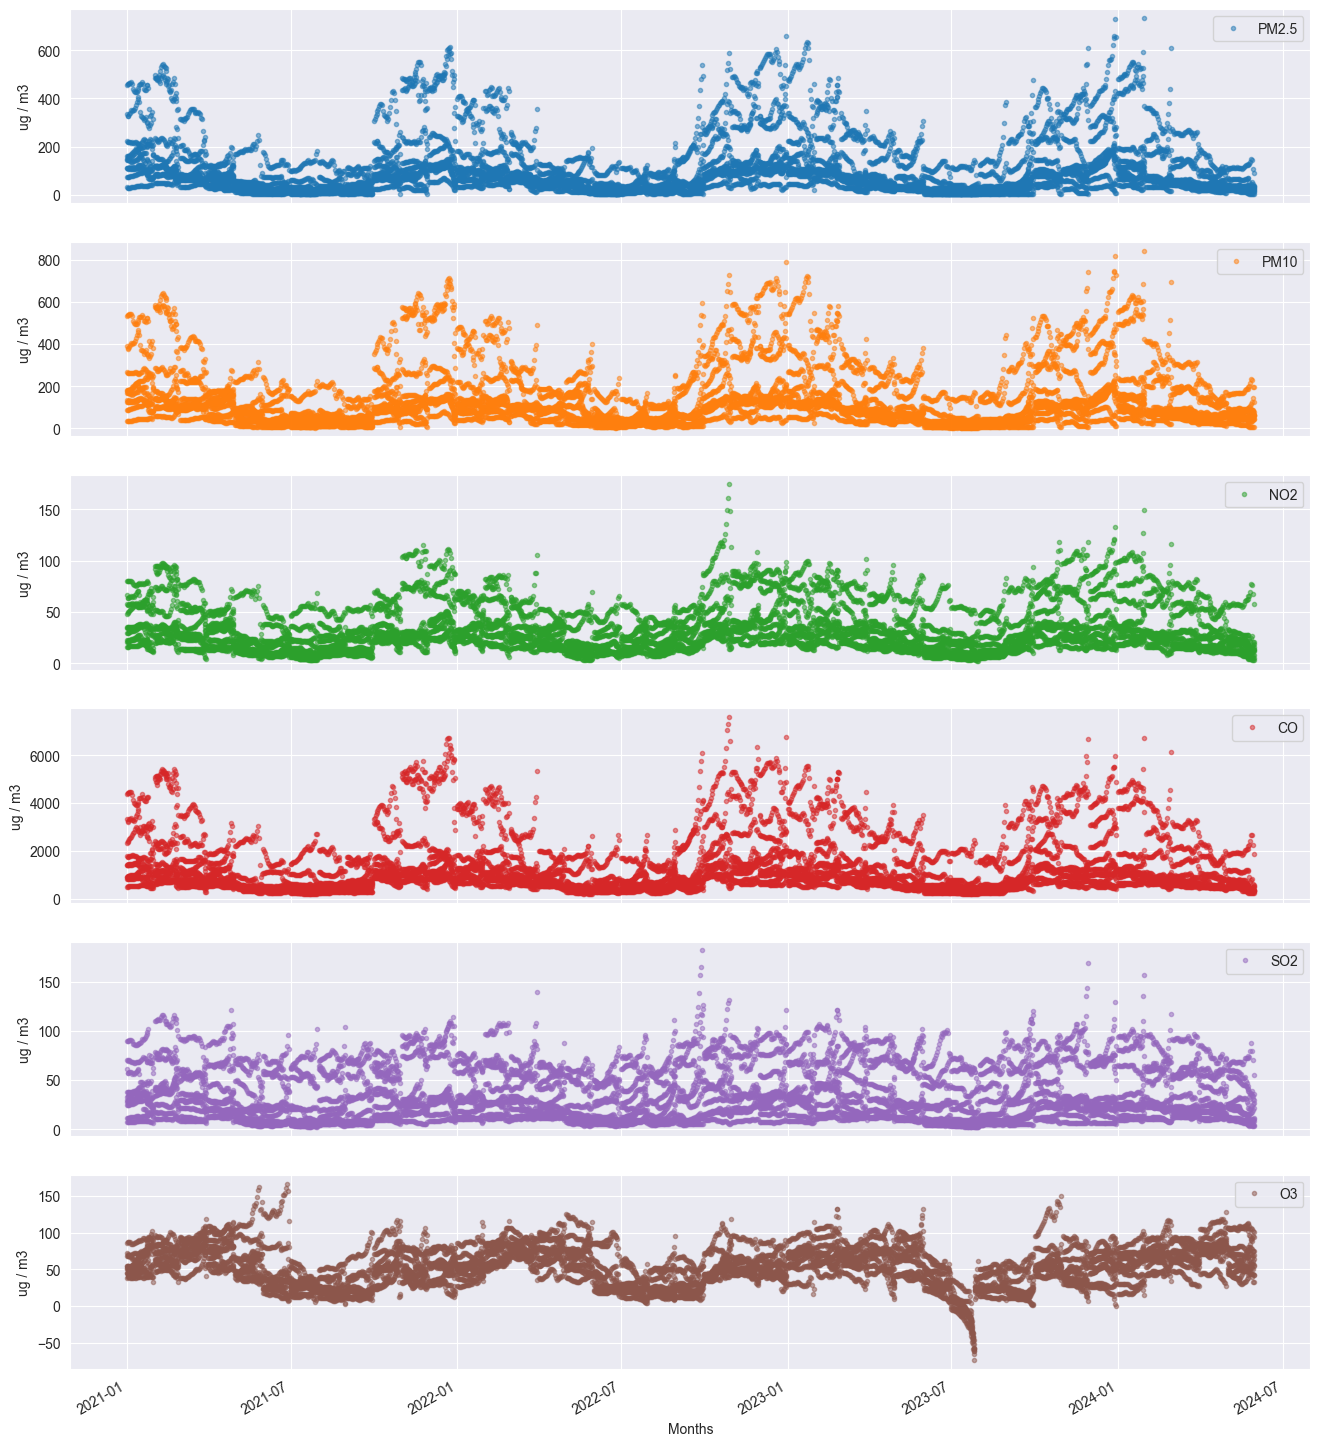

In [23]:
copy_df = new_df.copy()
copy_df.set_index('date',inplace=True)
axes = copy_df[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:
    
    ax.set_xlabel('Months')
    ax.set_ylabel('ug / m3')

<div style="background-color: black; padding:20px; font-size:20px; color: white">
PM2.5 and PM10 pollution show a seasonal effect, with pollution being higher in winter months as compared to the summer ones.

## 5.3 Visulaizing the trends in air pollutants 

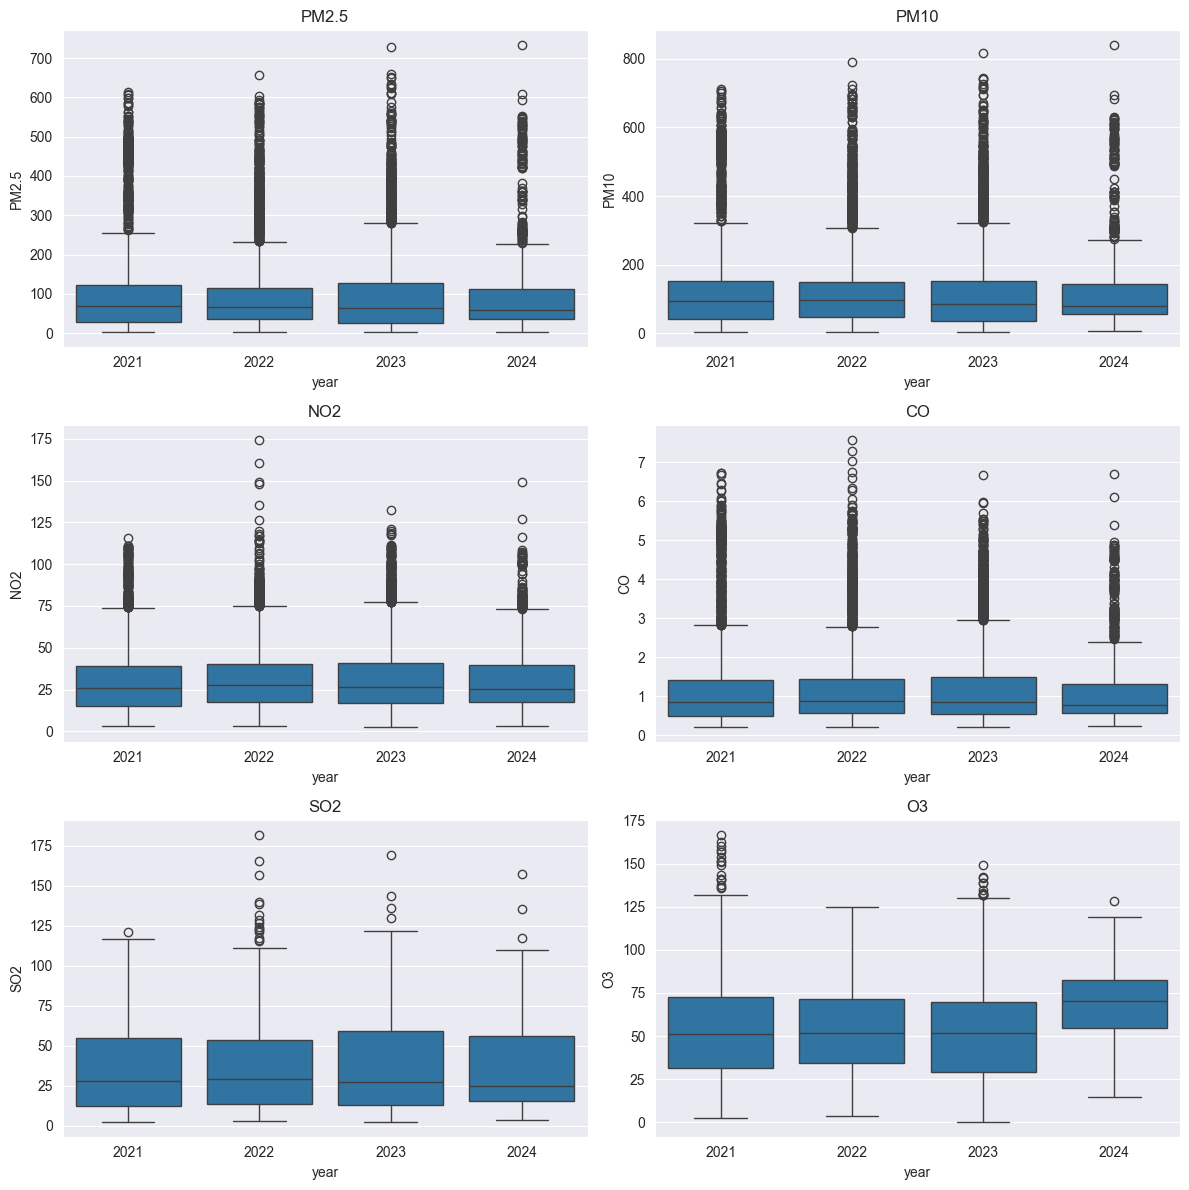

In [28]:
copy_df = new_df.copy()
values=['PM2.5','PM10','NO2', 'CO', 'SO2','O3']

copy_df['year'] = copy_df['date'].dt.year
copy_df['month'] = copy_df['date'].dt.strftime('%b')
years = copy_df['year'].unique()

plt.figure(figsize=(12, 12))
for i, col in enumerate(values, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=copy_df, x='year', y=col)
    plt.title(col)

plt.tight_layout()
plt.show()

## 5.4 Distribuiton of various gases and particulate in air

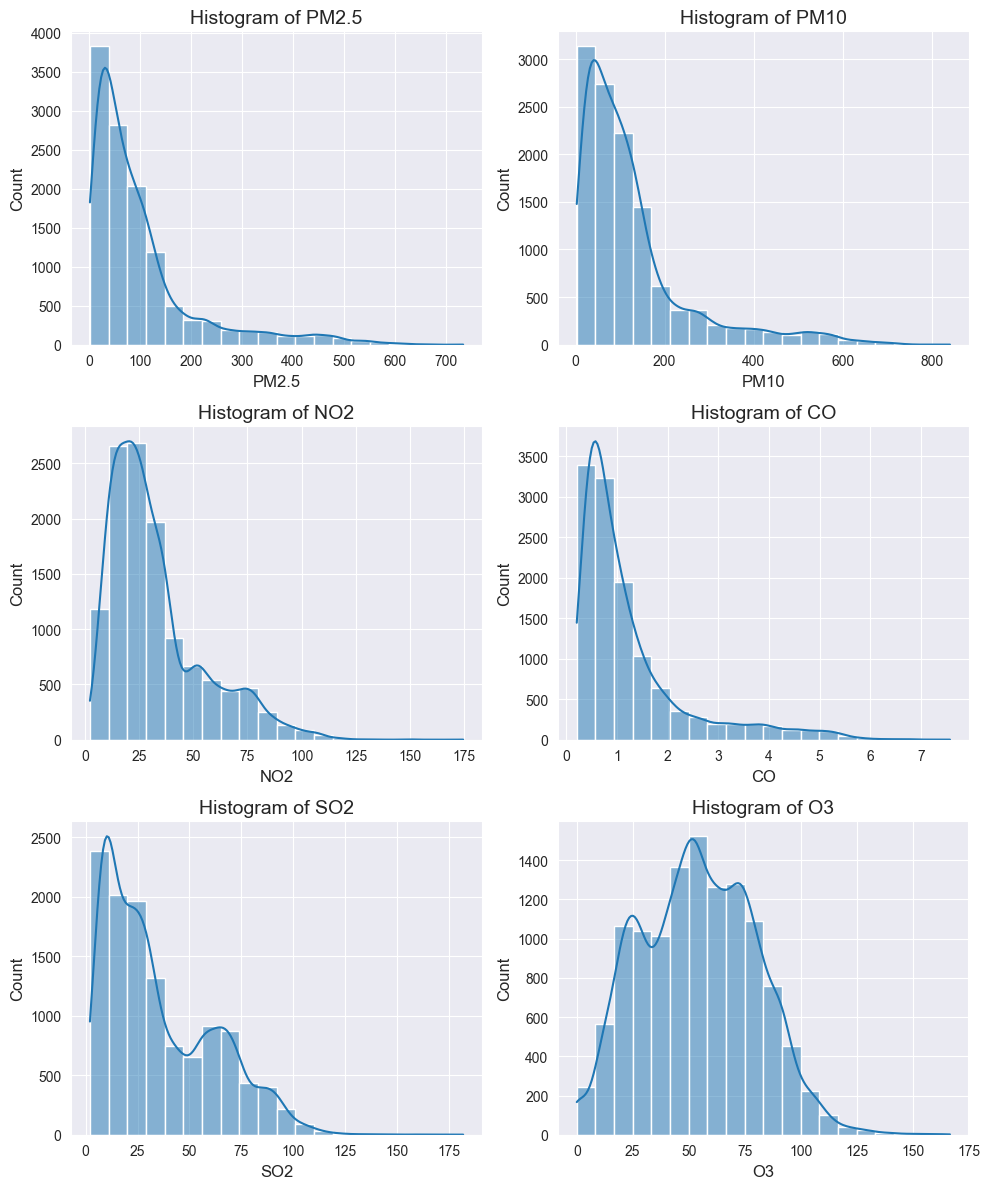

In [29]:
plt.figure(figsize=(10, 12))

for i, col in enumerate(pollutants, start=1):
    plt.subplot(3, 2, i)
    sns.histplot(copy_df[col].dropna(), bins=20, kde=True, edgecolor='white')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Histogram of {col}', fontsize=14)

plt.tight_layout()
plt.show()

<Figure size 1200x1200 with 0 Axes>

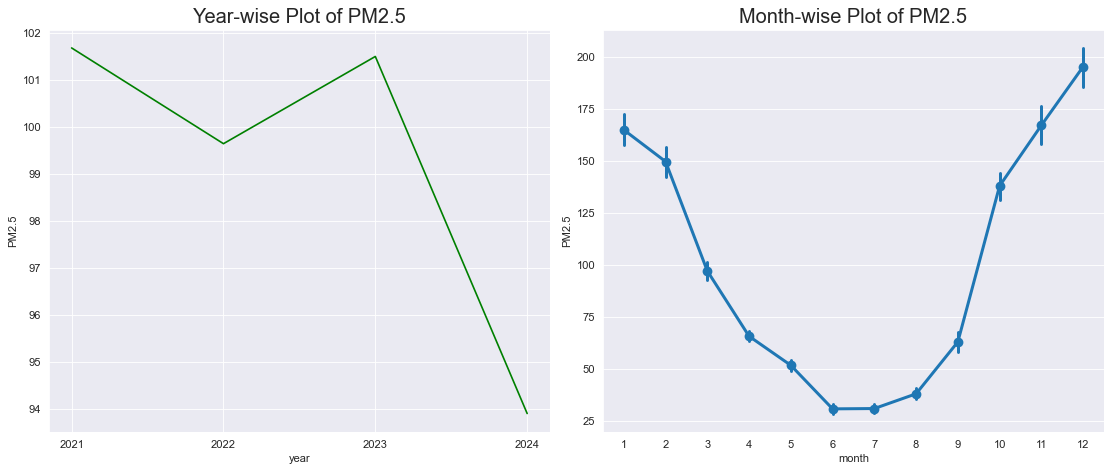

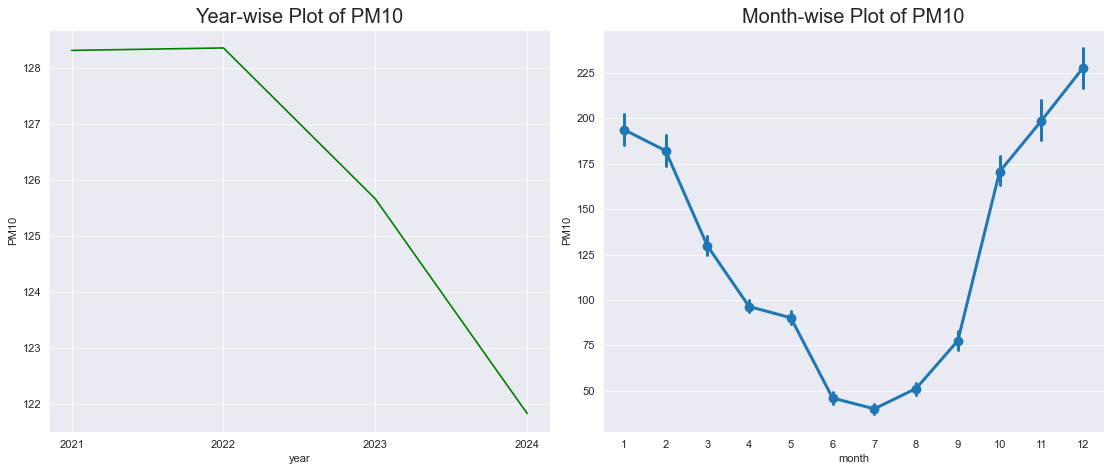

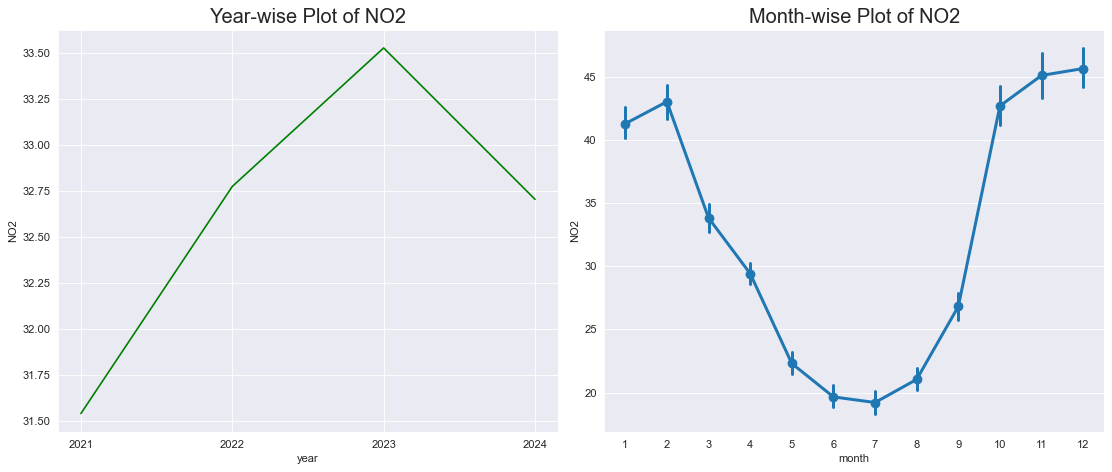

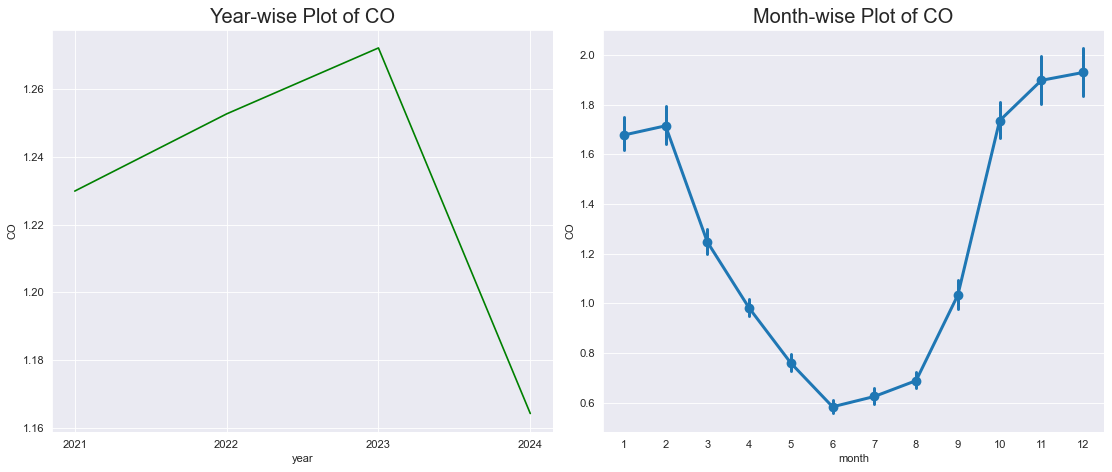

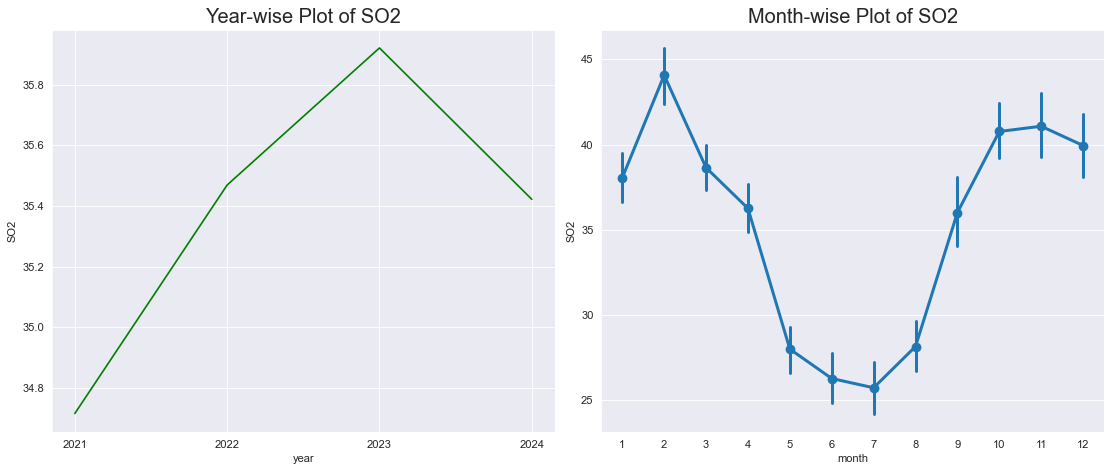

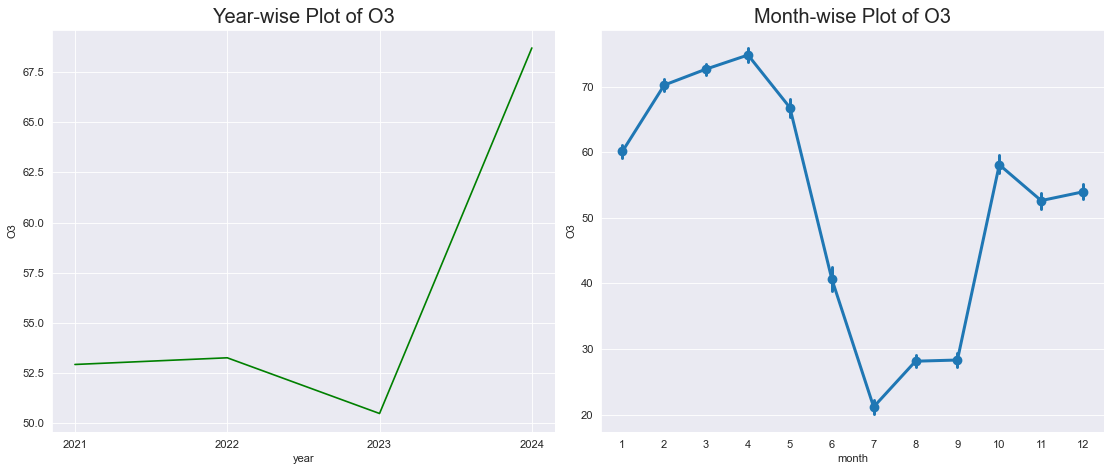

In [32]:
# Line plot analysis for amount of particulate matter and gases  over the years

copy_df['month'] = copy_df['date'].dt.month.astype(str)
copy_df['year'] = copy_df['date'].dt.year.astype(str)
values=['PM2.5','PM10','NO2', 'CO', 'SO2','O3']
plt.figure(figsize=(12, 12))

for i, value in enumerate(values, 1):
    fig, axes = plt.subplots(1, 2, figsize=(14,6), dpi= 80)
    sns.lineplot(x='year', y=value, data=copy_df, ax=axes[0], c='green', errorbar=None)
    sns.pointplot(x='month', y=value, data=copy_df.loc[~copy_df.year.isin([2021, 2023]), :])

    # Set Title
    axes[0].set_title(f'Year-wise Plot of {value}', fontsize=18); 
    axes[1].set_title(f'Month-wise Plot of {value}', fontsize=18)

    plt.tight_layout()
    plt.show()

## 5.4 Visulaizing the most polluted city within India in terms of air pollution

In [30]:

def max_polluted_city(pollutant):
    x1 = copy_df[[pollutant,'city']].groupby(["city"]).mean().sort_values(by=pollutant,ascending=False).reset_index()
    x1[pollutant] = round(x1[pollutant],2)
    return x1[:10].style.background_gradient(cmap='OrRd')

from IPython.display import display_html

def display_side_by_side(*args):
    html_str = ''.join([copy_df.to_html() + '&nbsp;&nbsp;&nbsp;' for copy_df in args])
    display_html(html_str.replace('table', 'table style="display:inline"'), raw=True)

pm2_5 = max_polluted_city('PM2.5')
pm10 = max_polluted_city('PM10')
no2 = max_polluted_city('NO2')
so2 = max_polluted_city('SO2')
co = max_polluted_city('CO')
o3 = max_polluted_city('O3')

display_side_by_side(pm2_5,pm10,no2,so2,co,o3)

,city,PM2.5
0,Kolkata,240.880000
1,Delhi,230.480000
2,Mumbai,120.780000
3,Ahmedabad,70.210000
4,Hyderabad,67.850000
5,Pune,67.160000
6,Jaipur,65.310000
7,Surat,58.730000
8,Chennai,54.060000
9,Bangalore,25.450000


<a id="1"></a>  
# <p style="padding:10px;background-color:#254441;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">6. City wise Analysis </p>

In [47]:
import plotly.express as px

def line_chart(dataframe, pollutants):
    # Ensure the 'date' column is of datetime type
    dataframe['date'] = pd.to_datetime(dataframe['date'])

    for pollutant in pollutants:
        fig = px.line(dataframe, x='date', y=pollutant, title=f'Line Chart for {pollutant}')
        fig.show()

In [48]:
def trend_plot(dataframe, pollutants):
    # Ensure the 'date' column is of datetime type
    dataframe['date'] = pd.to_datetime(dataframe['date'])

    # Prepare data
    dataframe['year'] = dataframe['date'].dt.year
    dataframe['month'] = dataframe['date'].dt.strftime('%b')
    years = dataframe['year'].unique()
    
    # Set up the subplot grid
    num_pollutants = len(pollutants)
    fig, axes = plt.subplots(num_pollutants, 2, figsize=(14, 6 * num_pollutants), dpi=80)
    
    # Generate plots for each pollutant
    for i, pollutant in enumerate(pollutants):
        sns.boxplot(x='year', y=pollutant, data=dataframe, ax=axes[i, 0])
        sns.pointplot(x='month', y=pollutant, data=dataframe.loc[~dataframe['year'].isin([2015, 2020]), :], ax=axes[i, 1])
        
        # Set titles
        axes[i, 0].set_title(f'Year-wise Box Plot for {pollutant} \n(The Trend)', fontsize=18)
        axes[i, 1].set_title(f'Month-wise Plot for {pollutant} \n(The Seasonality)', fontsize=18)
    
    plt.tight_layout()
    plt.show()

In [52]:

def plot_pollutants_over_months(dataframe, pollutants, years):
    # Ensure the 'date' column is of datetime type
    dataframe['date'] = pd.to_datetime(dataframe['date'])
    dataframe['month'] = dataframe['date'].dt.strftime('%b')
    
    for pollutant in pollutants:
        fig = go.Figure()
        
        for year in years:
            yearly_data = dataframe[dataframe['date'].dt.year == year]
            monthly_avg = yearly_data.groupby('month')[pollutant].mean().reindex(
                ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
            )
            fig.add_trace(go.Scatter(x=monthly_avg.index, y=monthly_avg, mode='lines+markers', name=str(year)))
        
        fig.update_layout(
            title=f'{pollutant} Concentration Over Months',
            xaxis_title='Month',
            yaxis_title=f'{pollutant} Concentration',
            legend_title='Year'
        )
        fig.show()

In [71]:
def kde_plot_pollutants_over_years(dataframe, pollutants, years):
    # Ensure the 'date' column is of datetime type
    dataframe['date'] = pd.to_datetime(dataframe['date'])
    dataframe['year'] = dataframe['date'].dt.year

    for pollutant in pollutants:
        plt.figure(figsize=(11, 5))
        for year in years:
            yearly_data = dataframe[dataframe['year'] == year]
            sns.kdeplot(yearly_data[pollutant], label=str(year), shade=True)
        
        plt.title(f'{pollutant} Concentration KDE Plot Over Years')
        plt.xlabel(f'{pollutant} Concentration')
        plt.ylabel('Density')
        plt.legend(title='Year')
        plt.show()

## 6.1 Delhi

In [44]:
df_Delhi = new_df[new_df['city']=='Delhi']
df_Delhi

,id,city,date,PM2.5,PM10,O3,NO2,SO2,CO,PM2.5_SubIndex,...,O3_SubIndex,CO_SubIndex,NOx_SubIndex,SO2_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated,Particulate_Matter,year,month
3618,3618,Delhi,2021-01-01,336.690,388.088,38.211,66.434,60.726,3.331319,466.684615,...,38.211,116.641487,83.04250,75.907500,6,467.0,Severe,724.778,2021,Jan
3619,3619,Delhi,2021-01-02,327.225,376.893,39.381,63.788,56.732,3.194193,459.403846,...,39.381,114.927413,79.73500,70.915000,6,459.0,Severe,704.118,2021,Jan
3620,3620,Delhi,2021-01-03,328.453,378.868,39.459,63.589,57.186,3.231214,460.348462,...,39.459,115.390175,79.48625,71.482500,6,460.0,Severe,707.321,2021,Jan
3621,3621,Delhi,2021-01-04,335.072,386.956,39.286,64.599,58.255,3.313671,465.440000,...,39.286,116.420887,80.74875,72.818750,6,465.0,Severe,722.028,2021,Jan
3622,3622,Delhi,2021-01-05,341.647,394.030,40.323,64.849,58.485,3.328347,470.497692,...,40.323,116.604337,81.06125,73.106250,6,470.0,Severe,735.677,2021,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4819,4819,Delhi,2024-05-26,135.184,213.046,95.006,69.389,79.691,2.399198,311.680000,...,95.006,104.989975,86.73625,99.613750,6,312.0,Very Poor,348.230,2024,May
4820,4820,Delhi,2024-05-27,148.749,232.926,91.378,77.134,87.705,2.676998,322.114615,...,91.378,108.462475,96.41750,102.568333,6,322.0,Very Poor,381.675,2024,May
4821,4821,Delhi,2024-05-28,144.453,229.525,87.876,76.151,79.277,2.665791,318.810000,...,87.876,108.322388,95.18875,99.096250,6,319.0,Very Poor,373.978,2024,May
4822,4822,Delhi,2024-05-29,106.958,194.909,74.460,67.166,70.586,2.259314,256.526667,...,74.460,103.241425,83.95750,88.232500,6,257.0,Poor,301.867,2024,May


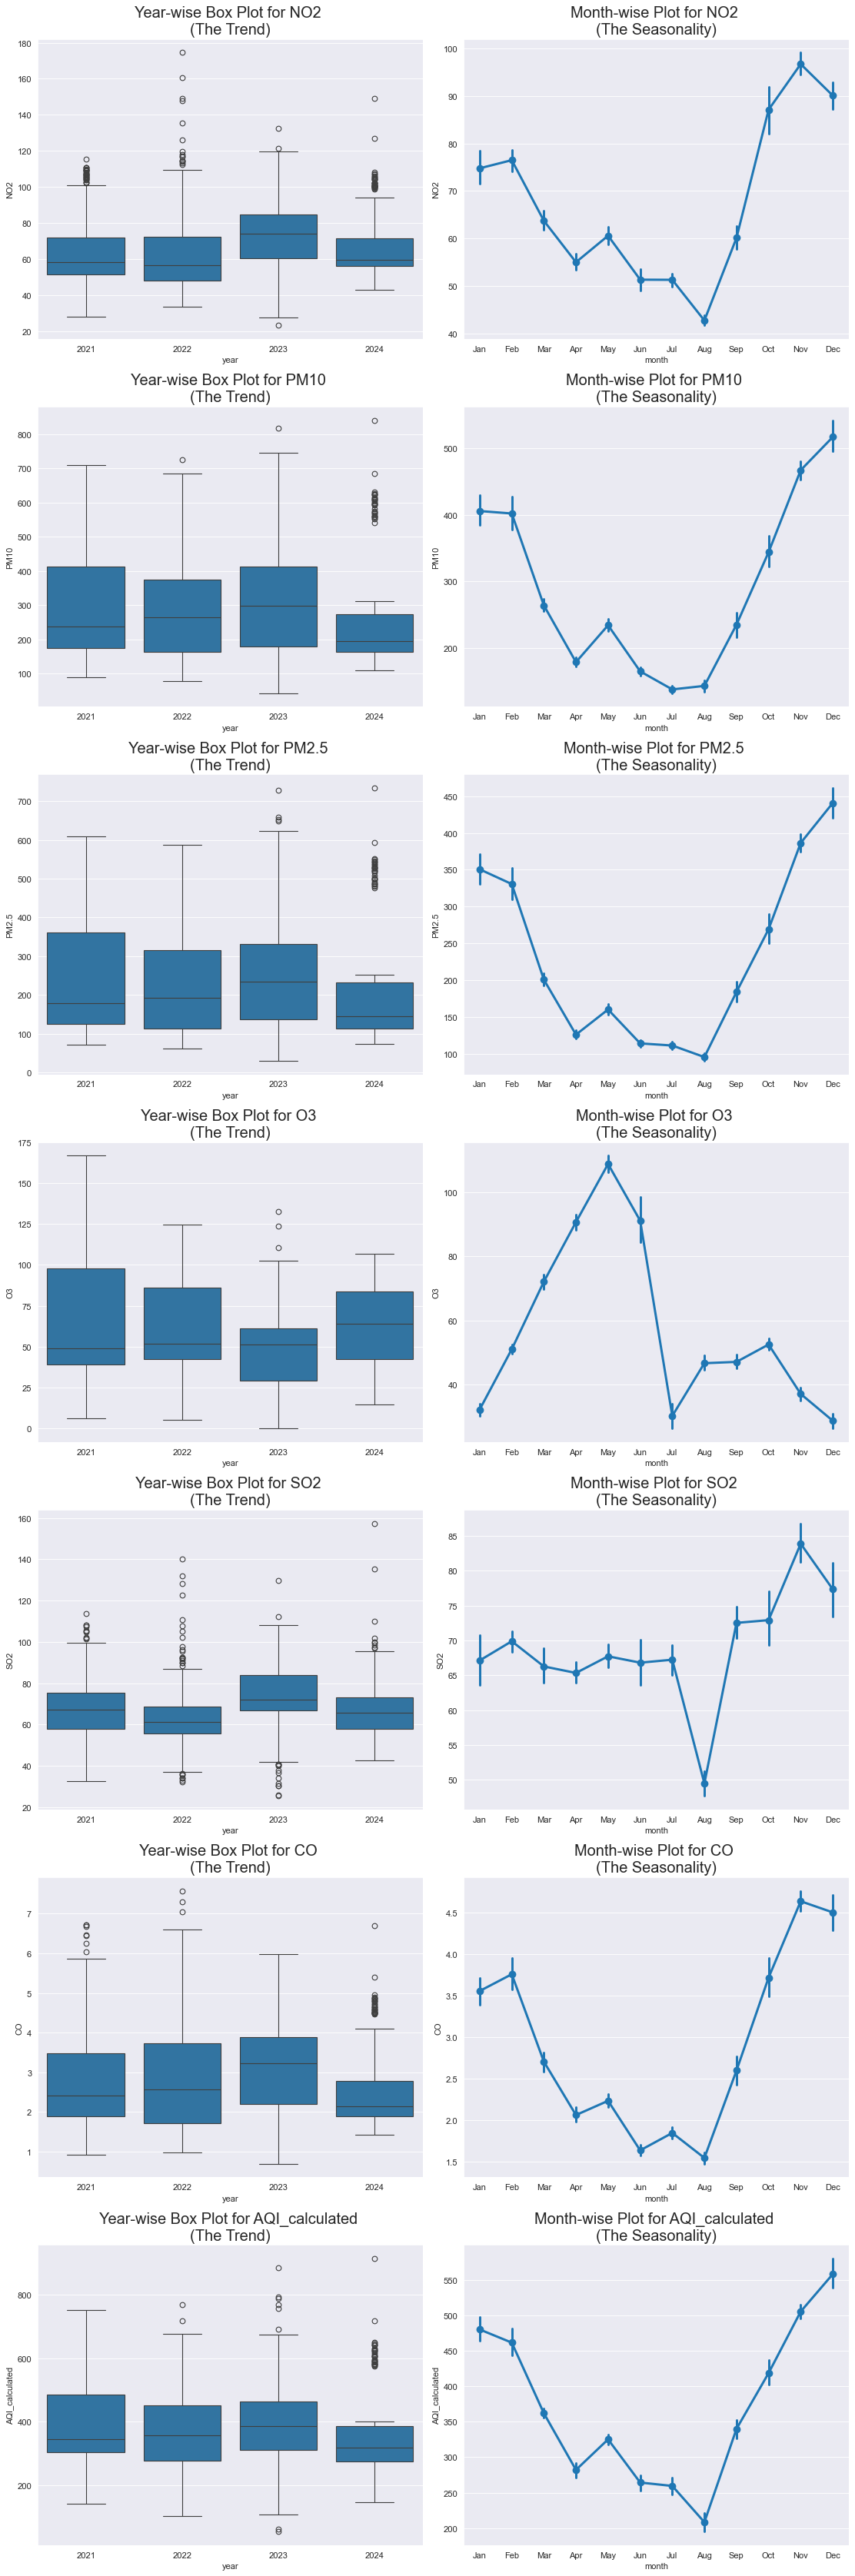

In [45]:
pollutants = ['NO2', 'PM10', 'PM2.5', 'O3', 'SO2', 'CO','AQI_calculated']
trend_plot(df_Delhi, pollutants)

In [46]:
pollutants = ['NO2', 'PM10', 'PM2.5', 'O3', 'SO2', 'CO']
line_chart(df_Delhi, pollutants)

In [54]:
pollutants = ['NO2', 'PM10', 'PM2.5', 'O3', 'SO2', 'CO','AQI_calculated']
years = [2021,2022,2023,2024]
plot_pollutants_over_months(df_Delhi, pollutants, years)

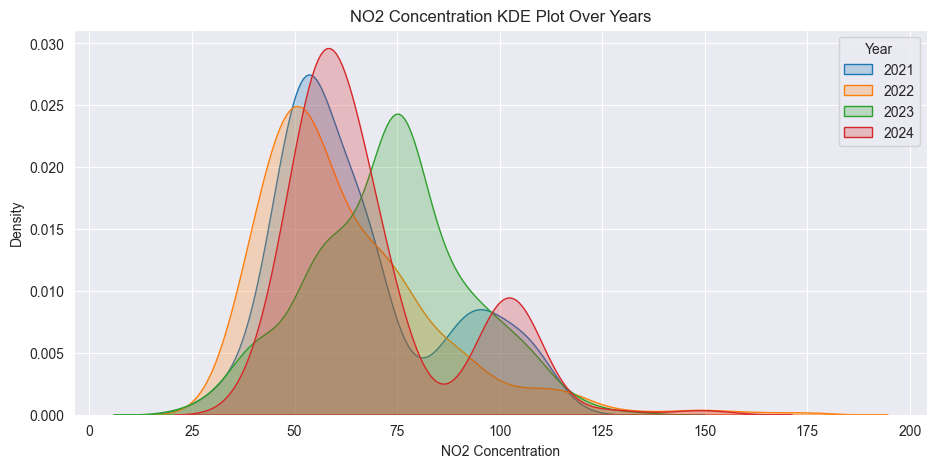

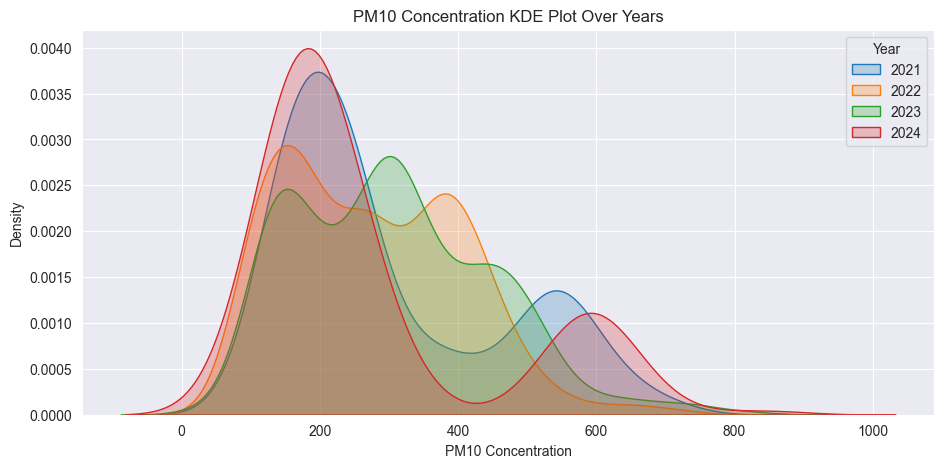

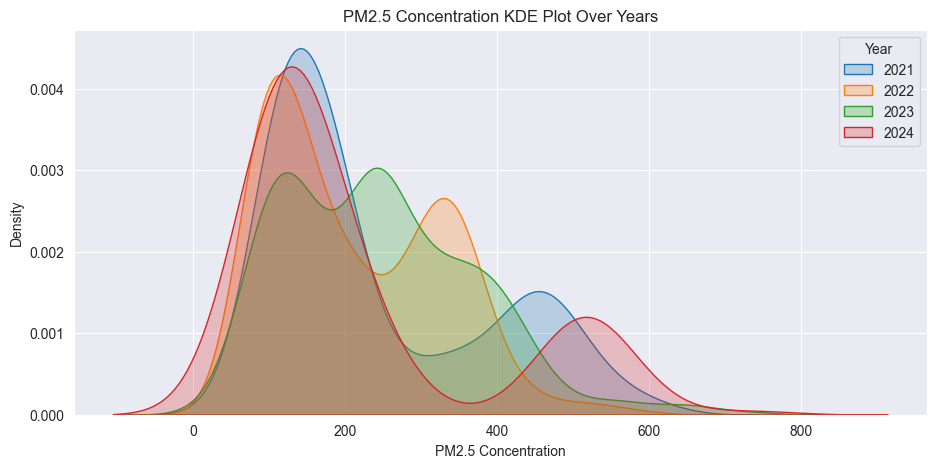

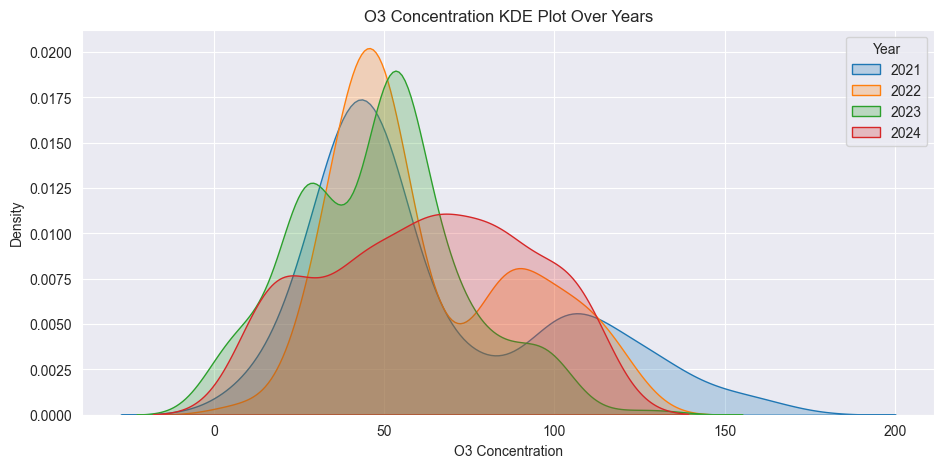

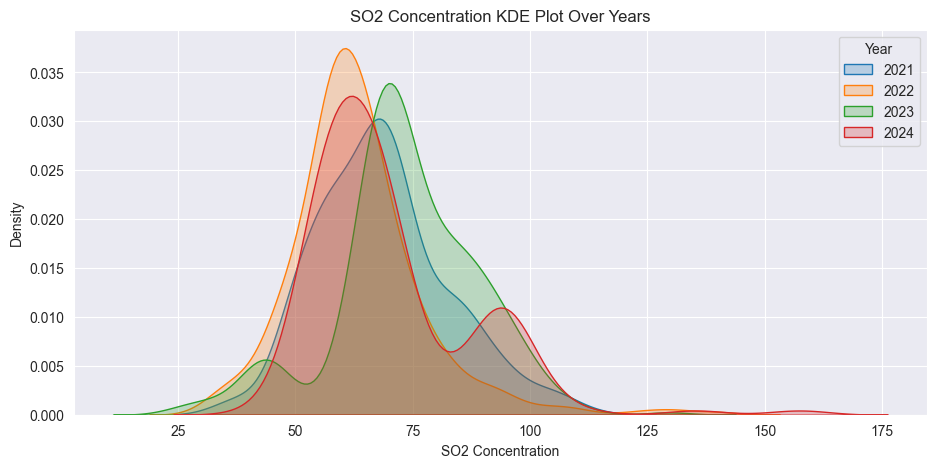

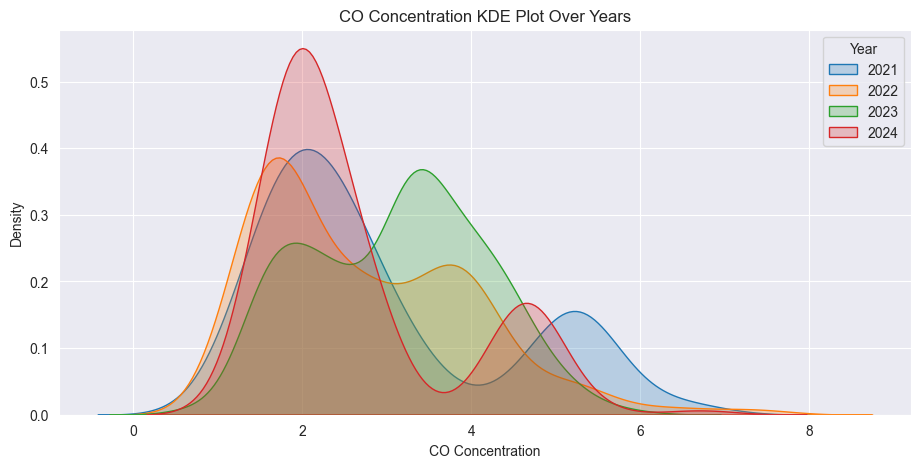

In [70]:
pollutants = ['NO2', 'PM10', 'PM2.5', 'O3', 'SO2', 'CO']
years = [2021,2022,2023,2024]
kde_plot_pollutants_over_years(df_Delhi, pollutants, years)

## 5.7 correlation analysis


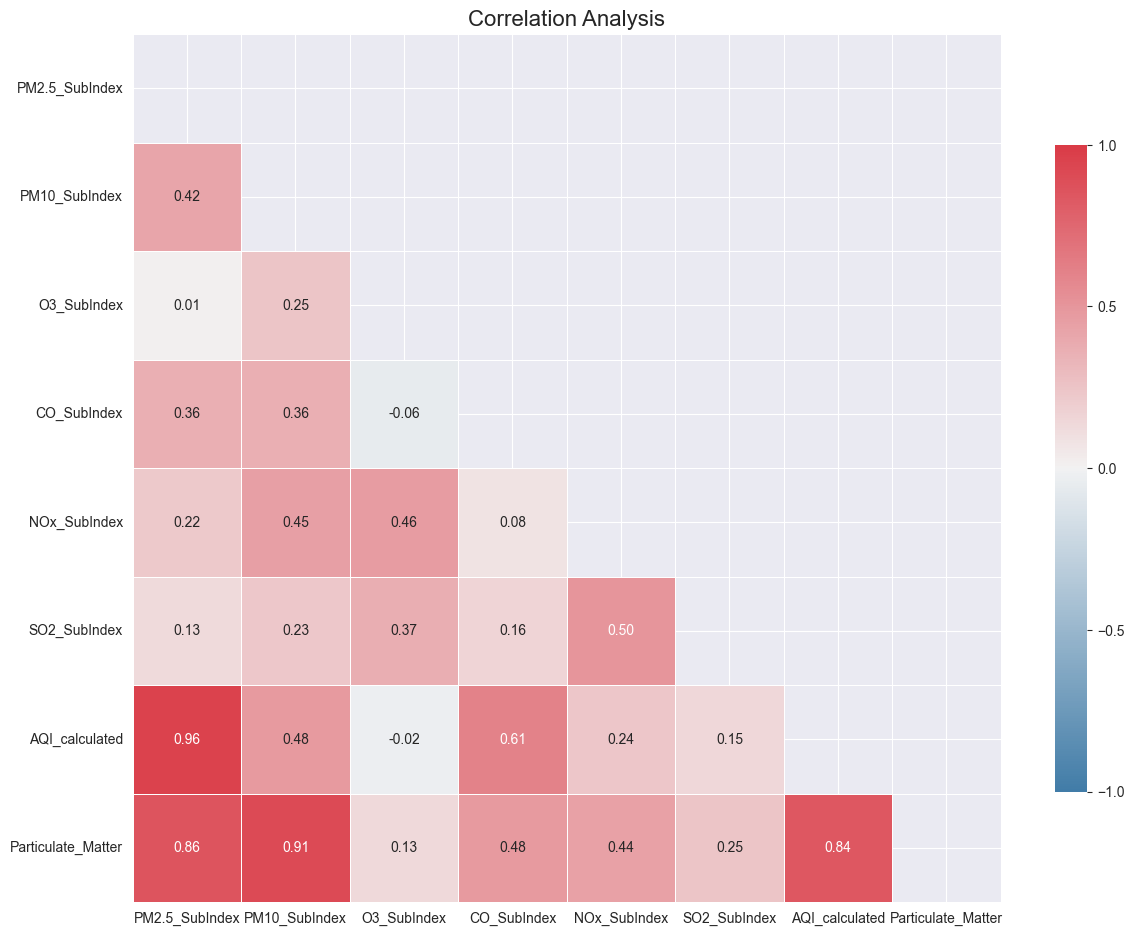

In [42]:
plt.figure(figsize=(14, 12))

# Assuming `new_df` is your DataFrame
copy_df = new_df.select_dtypes(include='float64')
copy_df = copy_df.iloc[ : , 11:]
# Calculate correlation matrix
correlation_matrix = copy_df.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Define custom color palette
cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f", 
            mask=mask, 
            cmap=cmap, 
            vmax=1, 
            vmin=-1,
            linewidths=.5,
            cbar_kws={"shrink": 0.7, "ticks": [-1, -0.5, 0, 0.5, 1]},
            square=True)

# Add title
plt.title('Correlation Analysis', fontsize=16)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Show plot
plt.show()

## 5.8 Time Series Analysis

In [43]:
copy_df = new_df.copy()
copy_df.head()

,date,city,CO,dew,humidity,NO2,O3,PM10,PM2.5,pressure,...,PM2.5_SubIndex,PM10_SubIndex,O3_SubIndex,CO_SubIndex,NOx_SubIndex,SO2_SubIndex,Checks,AQI_calculated,AQI_bucket_calculated,Particulate_Matter
0,2015-01-01,Bengaluru,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.0,0.000000,5.750,0.000,1,NaN,NaN,NaN
1,2015-01-01,Chennai,10.900000,NaN,NaN,5.5,1.6,29.0,153.0,NaN,...,325.384615,29.000000,1.6,212.857137,6.875,4.875,6,325.0,Very Poor,182.0
2,2015-01-01,Delhi,20.799999,NaN,NaN,66.5,5.2,230.0,382.0,NaN,...,501.538462,186.666667,5.2,322.352937,83.125,12.375,6,502.0,Severe,612.0
3,2015-01-01,Kolkata,NaN,NaN,NaN,NaN,NaN,NaN,239.0,NaN,...,391.538462,0.000000,0.0,0.000000,0.000,0.000,1,NaN,NaN,NaN
4,2015-01-01,Lucknow,18.500000,NaN,NaN,1.0,NaN,188.0,NaN,NaN,...,0.000000,158.666667,0.0,308.823529,1.250,4.375,4,309.0,Very Poor,NaN
